In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.float=float
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
data=pd.read_csv('D:/dip(AIML(cse))/kaggle/cricket_score-prediction.csv')
df=pd.DataFrame(data)
df

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
0,1,33,78.0,56,5,0,58.92,3,caught,2
1,1,33,77.0,49,6,0,67.34,3,caught,4
2,1,215,503.0,346,25,1,62.13,3,lbw,1
3,1,58,67.0,48,9,0,120.83,3,bowled,3
4,1,7,26.0,18,1,0,38.88,3,caught,1
...,...,...,...,...,...,...,...,...,...,...
291,6,0,2.0,4,0,0,0.00,1,bowled,4
292,6,52,NaN,53,6,1,98.11,1,bowled,1
293,6,41,NaN,62,6,0,66.12,1,caught,3
294,6,4,NaN,3,1,0,133.33,1,caught,2


In [23]:
df.isnull().sum()

Batsman      0
Runs         0
Mins         4
BF           0
4s           0
6s           0
SR           0
Pos          0
Dismissal    0
Inns         0
dtype: int64

In [24]:
mean=df['Mins'].mean()
df['Mins']=df['Mins'].fillna(mean)
df.isnull().sum()

Batsman      0
Runs         0
Mins         0
BF           0
4s           0
6s           0
SR           0
Pos          0
Dismissal    0
Inns         0
dtype: int64

<Axes: >

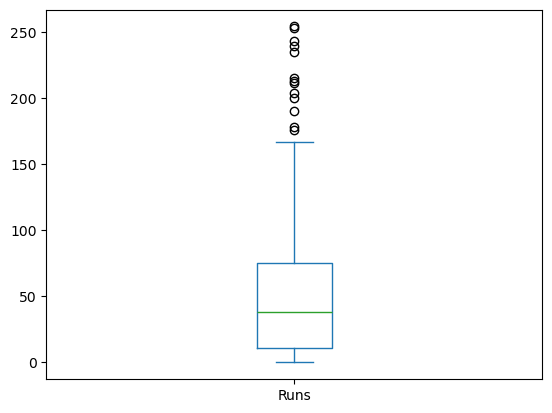

In [25]:
df['Runs'].plot(kind='box')

<Axes: >

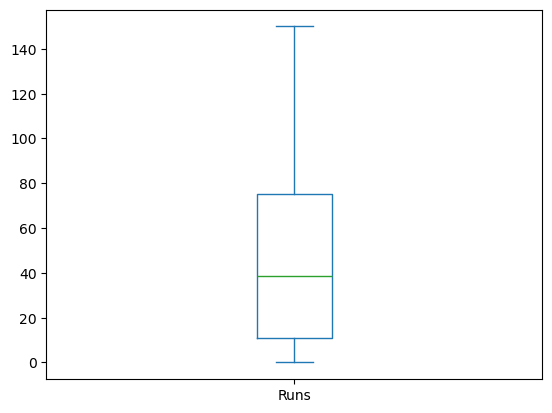

In [26]:
q1=df['Runs'].quantile(0.25)
q3=df['Runs'].quantile(0.75)
iqr=q3-q1
lower_bound=q3-(1.5*iqr)
upper_bound=q1+(1.5*iqr)
arr_Runs=df['Runs']
lower_cap = 0
upper_cap = 150
for i in df['Runs']:
    if i<lower_bound:
        df['Runs']=df['Runs'].replace(i,lower_cap)
    elif i>upper_bound:
        df['Runs']=df['Runs'].replace(i,upper_cap)
df['Runs'].plot(kind='box')

In [27]:
df = df.drop(columns=['Dismissal'])

In [28]:
y=df['Runs']
x=df.drop('Runs',axis=1)

In [29]:
y.head(10)

0     33
1     33
2    150
3     58
4      7
5      8
6      6
7      5
8    150
9     48
Name: Runs, dtype: int64

In [30]:
x.head(10)

,Batsman,Mins,BF,4s,6s,SR,Pos,Inns
0,1,78.0,56,5,0,58.92,3,2
1,1,77.0,49,6,0,67.34,3,4
2,1,503.0,346,25,1,62.13,3,1
3,1,67.0,48,9,0,120.83,3,3
4,1,26.0,18,1,0,38.88,3,1
5,1,40.0,27,1,0,29.62,3,3
6,1,2.0,3,1,0,200.00,3,1
7,1,20.0,9,1,0,55.55,3,3
8,1,387.0,252,17,2,56.74,3,1
9,1,98.0,78,8,0,61.53,4,1


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((236, 8), (60, 8), (236,), (60,))

In [33]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [36]:
#training
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(x_train)

# Metrics
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 204.69876550502116
RMSE: 14.307297631104944
R² Score: 0.9031588859484375


In [34]:
#testing
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(x_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 457.84602792580233
RMSE: 21.39733693537124
R² Score: 0.8479076297895599
